# Titanic Survival Prediction

In [2]:
#  Import the dependencies or the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score         
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Data Collection and Processing.


In [3]:
dataset = pd.read_csv("data.csv")
dataset.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0

In [4]:
#  check how many columns and ros in the dataset.
dataset.shape

(891, 12)

In [5]:
# getting some information about the dataset.
dataset.info()
# dataset.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#  Check the missing value in each column.
dataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

## Handle the missing and null Values.

In [7]:
dataset.drop("Cabin",axis = 1, inplace=True)

In [8]:
dataset

PassengerId  Pclass                                               Name  \
0              1       3                            Braund, Mr. Owen Harris   
1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3       3                             Heikkinen, Miss. Laina   
3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       3                           Allen, Mr. William Henry   
..           ...     ...                                                ...   
886          887       2                              Montvila, Rev. Juozas   
887          888       1                       Graham, Miss. Margaret Edith   
888          889       3           Johnston, Miss. Catherine Helen "Carrie"   
889          890       1                              Behr, Mr. Karl Howell   
890          891       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Embarked  Survived  
0      male  22.0      1      0         A/5 21171   7.2500        S         0  
1    female  38.0      1      0          PC 17599  71.2833        C         1  
2    female  26.0      0      0  STON/O2. 3101282   7.9250        S         1  
3    female  35.0      1      0            113803  53.1000        S         1  
4      male  35.0      0      0            373450   8.0500        S         0  
..      ...   ...    ...    ...               ...      ...      ...       ...  
886    male  27.0      0      0            211536  13.0000        S         0  
887  female  19.0      0      0            112053  30.0000        S         1  
888  female   NaN      1      2        W./C. 6607  23.4500        S         0  
889    male  26.0      0      0            111369  30.0000        C         1  
890    male  32.0      0      0            370376   7.7500        Q         0  

[891 rows x 11 columns]

In [9]:
#  check the missing value again.
dataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Survived         0
dtype: int64

In [10]:
#  Replace the null ages from the mean of the particular  feature
# dataset["Age"].fillna(dataset["Age"].mean(), inplace=True)

dataset.fillna({"Age" : dataset["Age"].mean()}, inplace=True)
dataset.fillna({"Embarked" : dataset["Embarked"].mode()[0]}, inplace=True)

In [11]:
#  Check the mode value for the Embarked feature or column.

# dataset.groupby("Embarked").count()
# dataset["Embarked"].mode()[0]

## Data Analysis Part

In [12]:
#  Getting the statistical methods of the datase.
dataset.describe()

PassengerId      Pclass         Age       SibSp       Parch  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    2.308642   29.699118    0.523008    0.381594   
std     257.353842    0.836071   13.002015    1.102743    0.806057   
min       1.000000    1.000000    0.420000    0.000000    0.000000   
25%     223.500000    2.000000   22.000000    0.000000    0.000000   
50%     446.000000    3.000000   29.699118    0.000000    0.000000   
75%     668.500000    3.000000   35.000000    1.000000    0.000000   
max     891.000000    3.000000   80.000000    8.000000    6.000000   

             Fare    Survived  
count  891.000000  891.000000  
mean    32.204208    0.383838  
std     49.693429    0.486592  
min      0.000000    0.000000  
25%      7.910400    0.000000  
50%     14.454200    0.000000  
75%     31.000000    1.000000  
max    512.329200    1.000000

In [13]:
# Finding the number of peoples is survived or not survived.
dataset["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## Data Visualization Part

In [14]:
sns.set()

C:\Users\USER\AppData\Local\Temp\ipykernel_9336\3130122131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Survived", data = dataset, palette="PuBuGn")


<Axes: xlabel='Survived', ylabel='count'>

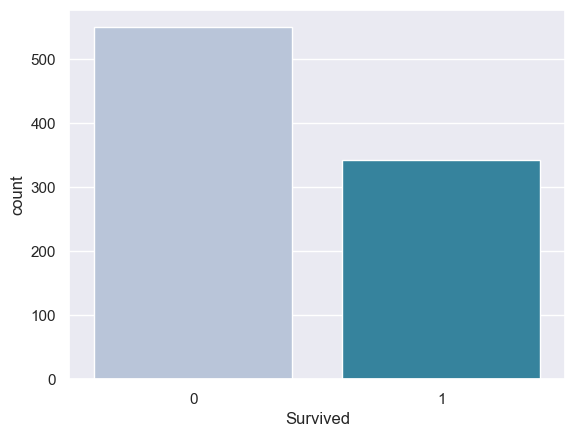

In [15]:
# make the count plot for the survived column.
sns.countplot(x = "Survived", data = dataset, palette="PuBuGn")

C:\Users\USER\AppData\Local\Temp\ipykernel_9336\1543340592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Sex", data = dataset, palette="PuBuGn")


<Axes: xlabel='Sex', ylabel='count'>

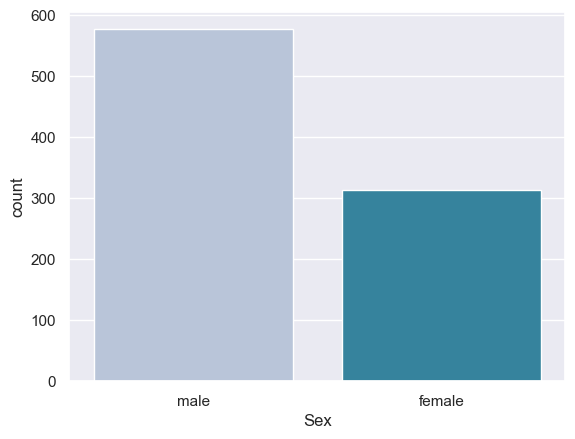

In [16]:
# make the count plot for the sex column.
sns.countplot(x = "Sex", data = dataset, palette="PuBuGn")

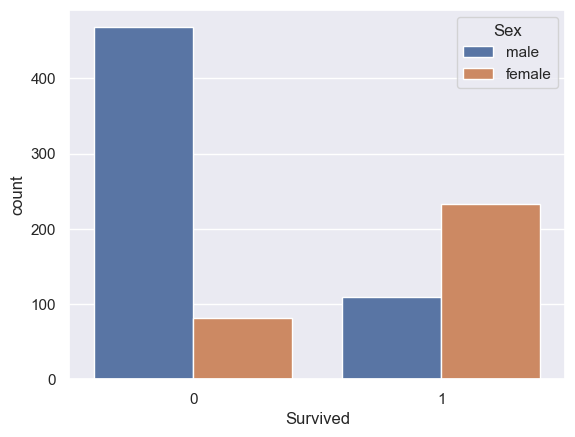

In [17]:
#  Number of survivers based on the gender.
sns.countplot(x = "Survived", hue = "Sex", data = dataset)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_9336\613680935.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Pclass", data = dataset, palette="RdPu")


<Axes: xlabel='Pclass', ylabel='count'>

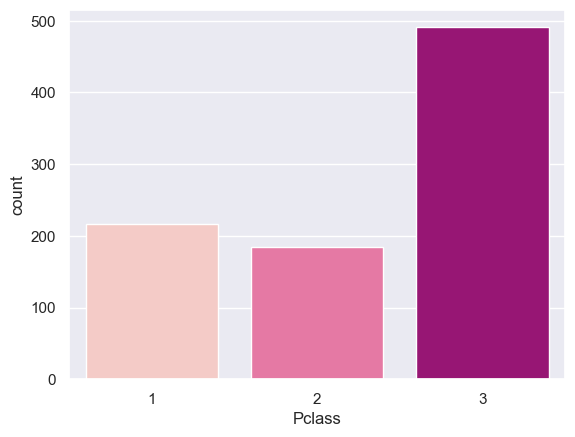

In [18]:
#  Making the countplot for the P class.
sns.countplot(x = "Pclass", data = dataset, palette="RdPu")

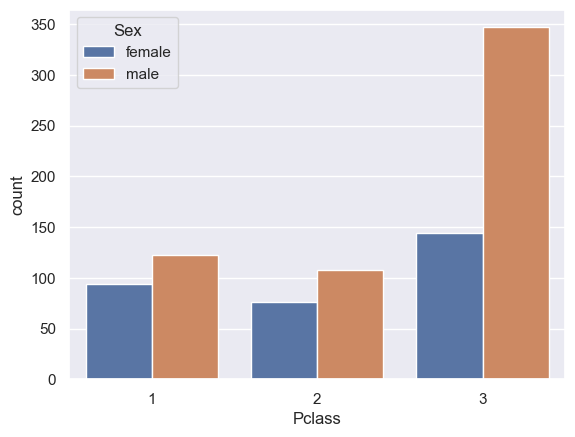

In [19]:
#  Number of Pclass member based on the gender.
sns.countplot(x = "Pclass", hue = "Sex", data = dataset)
plt.show()

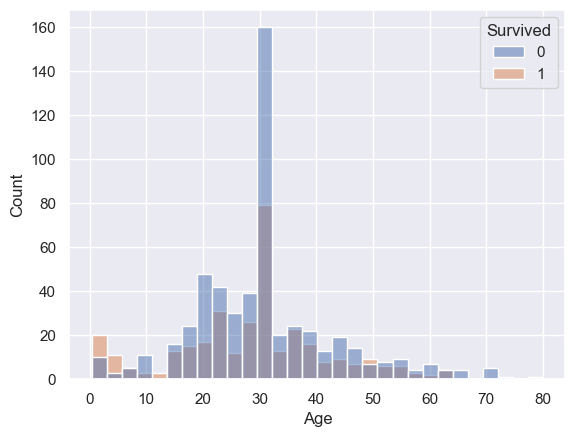

In [20]:
sns.histplot(x="Age",hue="Survived", data = dataset)
plt.show()

In [21]:
dataset.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked  Survived  
0    male  22.0      1      0         A/5 21171   7.2500        S         0  
1  female  38.0      1      0          PC 17599  71.2833        C         1  
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S         1  
3  female  35.0      1      0            113803  53.1000        S         1  
4    male  35.0      0      0            373450   8.0500        S         0

In [22]:
dataset["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

## Label Encoding Part of the dataset.

In [23]:
dataset.replace({"Sex": {"male" : 1, "female": 0}, "Embarked": {"S" : 0, "C": 1, "Q": 2}}, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_9336\2611736031.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({"Sex": {"male" : 1, "female": 0}, "Embarked": {"S" : 0, "C": 1, "Q": 2}}, inplace=True)


In [24]:
dataset

PassengerId  Pclass                                               Name  \
0              1       3                            Braund, Mr. Owen Harris   
1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3       3                             Heikkinen, Miss. Laina   
3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       3                           Allen, Mr. William Henry   
..           ...     ...                                                ...   
886          887       2                              Montvila, Rev. Juozas   
887          888       1                       Graham, Miss. Margaret Edith   
888          889       3           Johnston, Miss. Catherine Helen "Carrie"   
889          890       1                              Behr, Mr. Karl Howell   
890          891       3                                Dooley, Mr. Patrick   

     Sex        Age  SibSp  Parch            Ticket     Fare  Embarked  \
0      1  22.000000      1      0         A/5 21171   7.2500         0   
1      0  38.000000      1      0          PC 17599  71.2833         1   
2      0  26.000000      0      0  STON/O2. 3101282   7.9250         0   
3      0  35.000000      1      0            113803  53.1000         0   
4      1  35.000000      0      0            373450   8.0500         0   
..   ...        ...    ...    ...               ...      ...       ...   
886    1  27.000000      0      0            211536  13.0000         0   
887    0  19.000000      0      0            112053  30.0000         0   
888    0  29.699118      1      2        W./C. 6607  23.4500         0   
889    1  26.000000      0      0            111369  30.0000         1   
890    1  32.000000      0      0            370376   7.7500         2   

     Survived  
0           0  
1           1  
2           1  
3           1  
4           0  
..        ...  
886         0  
887         1  
888         0  
889         1  
890         0  

[891 rows x 11 columns]

In [25]:
dataset

PassengerId  Pclass                                               Name  \
0              1       3                            Braund, Mr. Owen Harris   
1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3       3                             Heikkinen, Miss. Laina   
3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       3                           Allen, Mr. William Henry   
..           ...     ...                                                ...   
886          887       2                              Montvila, Rev. Juozas   
887          888       1                       Graham, Miss. Margaret Edith   
888          889       3           Johnston, Miss. Catherine Helen "Carrie"   
889          890       1                              Behr, Mr. Karl Howell   
890          891       3                                Dooley, Mr. Patrick   

     Sex        Age  SibSp  Parch            Ticket     Fare  Embarked  \
0      1  22.000000      1      0         A/5 21171   7.2500         0   
1      0  38.000000      1      0          PC 17599  71.2833         1   
2      0  26.000000      0      0  STON/O2. 3101282   7.9250         0   
3      0  35.000000      1      0            113803  53.1000         0   
4      1  35.000000      0      0            373450   8.0500         0   
..   ...        ...    ...    ...               ...      ...       ...   
886    1  27.000000      0      0            211536  13.0000         0   
887    0  19.000000      0      0            112053  30.0000         0   
888    0  29.699118      1      2        W./C. 6607  23.4500         0   
889    1  26.000000      0      0            111369  30.0000         1   
890    1  32.000000      0      0            370376   7.7500         2   

     Survived  
0           0  
1           1  
2           1  
3           1  
4           0  
..        ...  
886         0  
887         1  
888         0  
889         1  
890         0  

[891 rows x 11 columns]

## Seperate the dataset into the training and the testing dataset.

In [26]:
x = dataset.drop(columns=["PassengerId", "Name","Ticket", "Survived"], axis = 1)
y = dataset["Survived"]

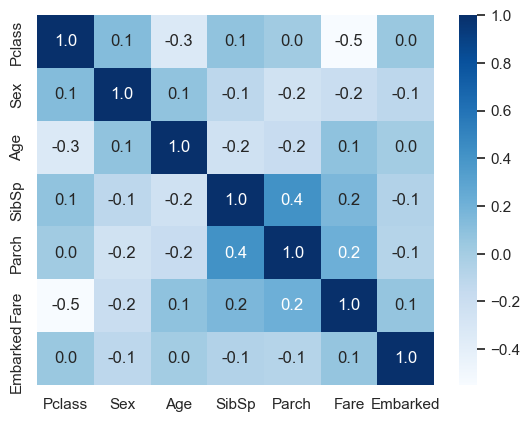

In [27]:
sns.heatmap(data = x.corr(), annot=True, cmap="Blues", fmt='.1f')
plt.show()

## Splitting the data into the training and the testing data.

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [29]:
print(x.shape, x_train.shape, x_test.shape)

(891, 7) (712, 7) (179, 7)


In [30]:
x.describe()

Pclass         Sex         Age       SibSp       Parch        Fare  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     2.308642    0.647587   29.699118    0.523008    0.381594   32.204208   
std      0.836071    0.477990   13.002015    1.102743    0.806057   49.693429   
min      1.000000    0.000000    0.420000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000   22.000000    0.000000    0.000000    7.910400   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.454200   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.000000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked  
count  891.000000  
mean     0.361392  
std      0.635673  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      2.000000

In [31]:
# Feature Scaling Part of the dataset.
scaler = StandardScaler()

In [32]:
scaler.fit(x_train)

StandardScaler()

In [33]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Logistic Regression Model Training and Implementation

In [85]:
# model = LogisticRegression(C=1.0)
# model = XGBClassifier(max_depth = 6, learning_rate = 0.5)
# model = DecisionTreeClassifier(max_depth=6)
# model = RandomForestClassifier(n_estimators=100)
# model = SVC(kernel='linear')
# model = GradientBoostingClassifier(learning_rate=0.7)
model = KNeighborsClassifier(n_neighbors=5)

In [86]:
model.fit(x_train, y_train)

KNeighborsClassifier()

## Model Accuracy or the Performance Score.

In [87]:
#  Find the model training and the testing accuracy.
training_data_prediction = model.predict(x_train)
training_data_accu = accuracy_score(training_data_prediction, y_train)
print("The accuracy of the training model is:- ", training_data_accu * 100)

# Finding the accuracy for the testing data.
testing_data_prediction = model.predict(x_test)
testing_data_accu = accuracy_score(testing_data_prediction, y_test)
print("The accuracy of the testing model is:- ", testing_data_accu * 100)

The accuracy of the training model is:-  86.37640449438202
The accuracy of the testing model is:-  78.2122905027933


In [45]:
# Model Predictive System.
new_data = np.array([0.8349173 , -1.34693328, -1.94843485,  1.31055608,  0.70454384,
       -0.26795467,  0.92568406])

shaped_array = new_data.reshape(1, -1)
prediction = model.predict(shaped_array)

if prediction == 0:
    print("Not Survived")
else:
    print("Survived")

Survived


In [203]:
# random = x
# dataset["Age"][dataset["Age"] <= 7]